# <center><u>Credit Card Fraud Detection as a Classification Problem</u></center>

### Business Problem

Credit card companies can detect fraudulent credit card transactions, preventing customers from being charged for products they did not purchase. Data Science and Machine Learning can be used to solve this type of problems. This project aims to demonstrate the modeling of a data set using machine learning with Credit Card Fraud Detection.

In [1]:
# Importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("creditcard.csv")
data.head().append(data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
display(data.info())
display(data.describe())
display(data.shape)
display(data.isnull().sum())
display(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


(284807, 31)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

1081

In [4]:
# drop duplicated values
data.drop_duplicates(inplace =True)

### Exploration and Visualization
Now we try to find out the relative proportion of valid and fraudulent credit card transactions.

Fraudulent Cases: 473
Valid Transactions: 283253
Proportion of Fraudulent Cases: 0.001667101358352777


<AxesSubplot:ylabel=' '>

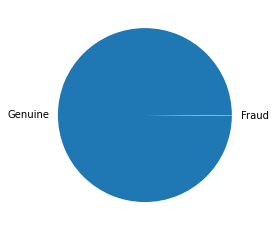

In [5]:
print("Fraudulent Cases: " + str(len(data[data["Class"] == 1])))
print("Valid Transactions: " + str(len(data[data["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data["Class"] == 1])/ data.shape[0]))

# To see how small are the number of Fraud transactions
data_pi = data.copy()
data_pi[" "] = np.where(data_pi["Class"] == 1 ,  "Fraud", "Genuine")

%matplotlib inline
data_pi[" "].value_counts().plot(kind="pie")

Clearly we can see that there is an imbalance in the data with only 0.17% of the total cases are fraudulent.

### Check average Money transaction for the fraudulent and no-fraudulent transations

In [6]:
print("Average Amount in a Fraudulent Transaction: " + str(data[data["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(data[data["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 123.87186046511626
Average Amount in a Valid Transaction: 88.41357475466688


As we can clearly notice from this, the average Money transaction for the fraudulent ones are more.

### Histograms where  values are subgrouped according to Class (valid or fraud)

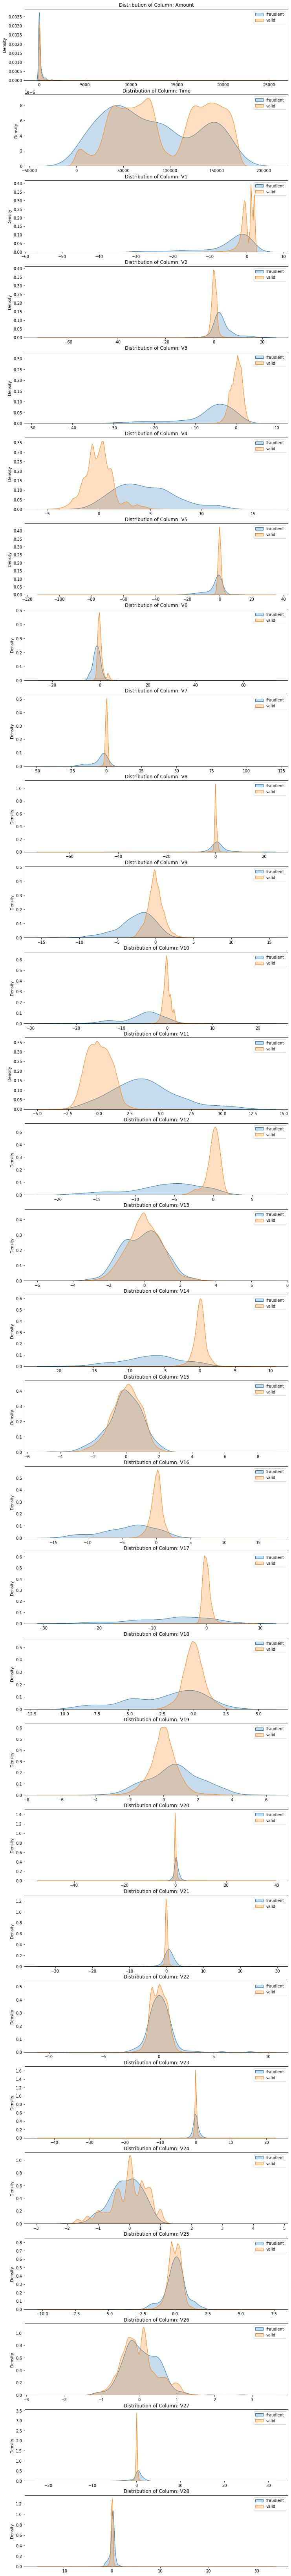

In [7]:
# Reorder the columns Amount, Time then the rest
data_plot = data.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))

grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
 ax.legend(labels=['fraudlent','valid'])
plt.show()



### Since there are no missing data, standardization is appropriate. We only use RobustScaler to standardize the Time and Amount columns because all other features of the original dataset from v1 to v28 are obtained using PCA, which is already standardized.

In [8]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(data[["Time", "Amount"]])
data[["Time", "Amount"]] = scaler.transform(data[["Time", "Amount"]])

data.head().append(data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0
284802,1.035258,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.295230,0
284803,1.035270,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038798,0
284804,1.035282,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.638020,0
284805,1.035282,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.166875,0
284806,1.035329,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.711723,0


### Modelling


First we divide the data into TARGET and features. And also make the train-test split of the data for further modelling and validation.

In [9]:
# Separate TARGET and features
y = data["Class"]
X = data.iloc[:,0:30]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

Now we describe the flow of the modelling section first and then dive into the sea. As we identified earlier, the dataset is highly imbalanced. Fitting a model on this dataset will result in overfitting towards the majority class. For illustration let's run one model (Random Forest) on the imbalanced data and see the performance.

In [10]:
# Using SKLEARN module for random forest
from sklearn.ensemble import RandomForestClassifier 

# Fit and predict
naive_rfc = RandomForestClassifier() 
naive_rfc.fit(X_train, y_train) 
naive_test_preds = naive_rfc.predict(X_test)


# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
  
print("The accuracy is {}".format(accuracy_score(y_test, naive_test_preds) )) 
print("The precision is {}".format(precision_score(y_test, naive_test_preds)))
print("The recall is {}".format(recall_score(y_test, naive_test_preds) )) 
print("The f1 score is {}".format(f1_score(y_test, naive_test_preds) )) 

The accuracy is 0.9995418179254926
The precision is 0.9705882352941176
The recall is 0.7333333333333333
The f1 score is 0.8354430379746834


One thing to notice here is, we had only 0.17% cases with fraud transactions and a model predicting all trasactions to be valid would have similar accuracy. So we need to train our model in a way that is not overfitted to either of the classes. for this, we introduce Oversampling and Undersampling methods. 
Oversampling resamples from the minority class to balance the class proportions. And undersampling merges or removes similar observations from the majority to achive the same.

### Undersampling

In this section we first describe the structure of the modelling and validations. One trivial point to note is, we will not undersample the test data as we want our model to perform well with skewed class distributions eventually.
The steps are as follows (The whole set-up will be structured using the imbalance-learn module): 
* Use a 5-fold cross validation on the training set
* On each of the folds use undersampling 
* Fit the model on the training folds and validate on the validation fold

In [11]:
# Create the cross validation framework 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

In [12]:
#pip install imblearn

In [13]:
# Import the imbalance Learn module
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Undersampling - Logistic Regression

In [14]:
# Logistic Regression 
imba_pipeline = make_pipeline(NearMiss(), 
                              LogisticRegression())

log_reg_params = {"penalty": ['l1', 'l2'], 
                  'C': [ 0.01, 0.1, 1, 100], 
                  'solver' : ['liblinear']}

new_params = {'logisticregression__' + key: log_reg_params[key] for key in log_reg_params}


grid_imba_log_reg = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, 
                                  return_train_score=True)

grid_imba_log_reg.fit(X_train, y_train);
logistic_cv_score_us = cross_val_score(grid_imba_log_reg, X_train, y_train, scoring = 'recall', cv = kf)


y_test_predict = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict(X_test)
logistic_recall_us = recall_score(y_test, y_test_predict)
logistic_accuracy_us = accuracy_score(y_test, y_test_predict)

log_reg_us = grid_imba_log_reg.best_estimator_

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
log_reg_us, logistic_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('logisticregression',
                  LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))]),
 array([0.85526316, 0.89473684, 0.92207792, 0.90909091, 0.92207792]))

In [16]:
log_reg_us, logistic_cv_score_us, logistic_recall_us, logistic_accuracy_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('logisticregression',
                  LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))]),
 array([0.85526316, 0.89473684, 0.92207792, 0.90909091, 0.92207792]),
 0.8777777777777778,
 0.745426990448666)

In [17]:
f1_socre_log = f1_score(y_test, y_test_predict, average = 'weighted')

recall_log = recall_score(y_test, y_test_predict) 

precision_log = precision_score(y_test, y_test_predict)

print(f1_socre_log, recall_log, precision_log)

0.8525783770870812 0.8777777777777778 0.005443020531900235


In [18]:
# Cumulatively create a table for the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
yproba = grid_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Logistic Regression",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
display(result_table)

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 5.295114374470489e-05, 0.000353007624964...","[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...",0.921567


#### Undersampling - Random Forest 

In [19]:
# Define the pipeline
imba_pipeline = make_pipeline(NearMiss(), 
                              RandomForestClassifier())
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}


grid_imba_rf = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,
                        return_train_score=True)

grid_imba_rf.fit(X_train, y_train);

rfc_cv_score_us = cross_val_score(grid_imba_rf, X_train, y_train, scoring='recall', cv=kf)

y_test_predict = grid_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)
rfc_recall_us = recall_score(y_test, y_test_predict)
rfc_accuracy_us = accuracy_score(y_test, y_test_predict)


rfc = grid_imba_rf.best_estimator_

In [20]:
rfc,rfc_recall_us, rfc_accuracy_us, rfc_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('randomforestclassifier',
                  RandomForestClassifier(max_depth=4, n_estimators=50,
                                         random_state=13))]),
 0.9555555555555556,
 0.189669756458605,
 array([0.93421053, 0.96052632, 0.94805195, 0.96103896, 1.        ]))

In [21]:
f1_socre_rfc = f1_score(y_test, y_test_predict, average = 'weighted')

recall_rfc= recall_score(y_test, y_test_predict) 

precision_rfc = precision_score(y_test, y_test_predict)

print(f1_socre_rfc, recall_rfc, precision_rfc)

0.3166242961086456 0.9555555555555556 0.0018669271681319875


In [22]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Random Forest",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
                                        
display(result_table)

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 5.295114374470489e-05, 0.000353007624964...","[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...",0.921567
1,Random Forest,"[0.0, 8.825190624117481e-05, 8.825190624117481...","[0.0, 0.4444444444444444, 0.5222222222222223, ...",0.873910


#### Undersampling - Support Vector Classifier

In [23]:
# Define the pipeline
imba_pipeline = make_pipeline(NearMiss(), 
                              SVC(probability = True))
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

new_params = {'svc__' + key: svc_params[key] for key in svc_params}

grid_imba_svc = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,
                        return_train_score=True)

grid_imba_svc.fit(X_train, y_train);

svc_cv_score_us = cross_val_score(grid_imba_svc, X_train, y_train, scoring='recall', cv=kf) 

y_test_predict = grid_imba_svc.best_estimator_.named_steps['svc'].predict(X_test)
svc_recall_us = recall_score(y_test, y_test_predict)
svc_accuracy_us = accuracy_score(y_test, y_test_predict)


svc = grid_imba_svc.best_estimator_

In [24]:
svc, svc_recall_us, svc_accuracy_us, svc_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('svc', SVC(C=0.5, kernel='poly', probability=True))]),
 0.6,
 0.9916117435590174,
 array([0.63157895, 0.59210526, 0.75324675, 0.71428571, 0.62337662]))

In [25]:
f1_socre_svc = f1_score(y_test, y_test_predict, average = 'weighted')

recall_svc = recall_score(y_test, y_test_predict)

precision_svc = precision_score(y_test, y_test_predict)

print(f1_socre_svc, recall_svc, precision_svc)

0.9944981538721104 0.6 0.10931174089068826


In [26]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_svc.best_estimator_.named_steps['svc'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Support Vector Classifier",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
display(result_table)

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 5.295114374470489e-05, 0.000353007624964...","[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...",0.921567
1,Random Forest,"[0.0, 8.825190624117481e-05, 8.825190624117481...","[0.0, 0.4444444444444444, 0.5222222222222223, ...",0.873910
2,Support Vector Classifier,"[0.0, 0.0011825755436317424, 0.001182575543631...","[0.0, 0.2111111111111111, 0.2222222222222222, ...",0.958260


#### Undersampling - Decision Tree Classifier

In [27]:
# DecisionTree Classifier
imba_pipeline = make_pipeline(NearMiss(), 
                              DecisionTreeClassifier())

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
new_params = {'decisiontreeclassifier__' + key: tree_params[key] for key in tree_params}
#grid_imba_tree = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)
grid_imba_tree = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, 
                        return_train_score=True)


grid_imba_tree.fit(X_train, y_train);
dtree_cv_score_us = cross_val_score(grid_imba_tree, X_train, y_train, scoring='recall', cv=kf)


y_test_predict = grid_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict(X_test)
dtree_recall_us = recall_score(y_test, y_test_predict)
dtree_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Decision Tree Classifier: " + str(udtree_cv_score.mean()))
# print("Recall Score for Decision Tree Classifier: " + str(udtree_recall))
tree_clf = grid_imba_tree.best_estimator_

In [28]:
tree_clf, dtree_accuracy_us, dtree_recall_us, dtree_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(max_depth=2, min_samples_leaf=6))]),
 0.6681704437317167,
 0.8222222222222222,
 array([0.89473684, 0.90789474, 0.93506494, 0.90909091, 0.87012987]))

In [29]:
f1_socre_dtree = f1_score(y_test, y_test_predict, average = 'weighted')

recall_dtree = recall_score(y_test, y_test_predict)

precision_dtree = precision_score(y_test, y_test_predict)

print(f1_socre_dtree, recall_dtree, precision_dtree)

0.7995125912644028 0.8222222222222222 0.003917831427361288


In [30]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "Decision Tree",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
                                        
display(result_table)

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 5.295114374470489e-05, 0.000353007624964...","[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...",0.921567
1,Random Forest,"[0.0, 8.825190624117481e-05, 8.825190624117481...","[0.0, 0.4444444444444444, 0.5222222222222223, ...",0.873910
2,Support Vector Classifier,"[0.0, 0.0011825755436317424, 0.001182575543631...","[0.0, 0.2111111111111111, 0.2222222222222222, ...",0.958260
3,Decision Tree,"[0.0, 0.24634637108161536, 0.2751870940412313,...","[0.0, 0.022222222222222223, 0.8222222222222222...",0.670243


#### Undersampling - k-Nearest Neighbour Classifier

In [31]:
# KNeighbors Classifier
imba_pipeline = make_pipeline(NearMiss(), 
                              KNeighborsClassifier())

knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

new_params = {'kneighborsclassifier__' + key: knears_params[key] for key in knears_params}

grid_imba_knn = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, 
                        return_train_score=True)

grid_imba_knn.fit(X_train, y_train);
knear_cv_score_us = cross_val_score(grid_imba_knn, X_train, y_train, scoring='recall', cv=kf)


y_test_predict = grid_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict(X_test)
knear_recall_us = recall_score(y_test, y_test_predict)
knear_accuracy_us = accuracy_score(y_test, y_test_predict)

knears_neighbors = grid_imba_knn.best_estimator_

In [32]:
knears_neighbors, knear_accuracy_us, knear_recall_us, knear_cv_score_us

(Pipeline(steps=[('nearmiss', NearMiss()),
                 ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))]),
 0.8127797554012618,
 0.8666666666666667,
 array([0.84210526, 0.93421053, 0.90909091, 0.93506494, 0.8961039 ]))

In [33]:
f1_socre_knears = f1_score(y_test, y_test_predict, average = 'weighted')

recall_knears= recall_score(y_test, y_test_predict)

precision_knears= precision_score(y_test, y_test_predict)

print(f1_socre_knears, recall_knears, precision_knears)

0.8951661389883894 0.8666666666666667 0.007296538821328344


In [34]:
# Cumulatively create a table for the ROC curve
yproba = grid_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict_proba(X_test)[::,1]
    
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

result_table = result_table.append({'classifiers': "k-Nearest Neighbour",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
display(result_table)

,classifiers,fpr,tpr,auc
0,Logistic Regression,"[0.0, 5.295114374470489e-05, 0.000353007624964...","[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...",0.921567
1,Random Forest,"[0.0, 8.825190624117481e-05, 8.825190624117481...","[0.0, 0.4444444444444444, 0.5222222222222223, ...",0.873910
2,Support Vector Classifier,"[0.0, 0.0011825755436317424, 0.001182575543631...","[0.0, 0.2111111111111111, 0.2222222222222222, ...",0.958260
3,Decision Tree,"[0.0, 0.24634637108161536, 0.2751870940412313,...","[0.0, 0.022222222222222223, 0.8222222222222222...",0.670243
4,k-Nearest Neighbour,"[0.0, 0.07884425303586558, 0.1873058458062694,...","[0.0, 0.8444444444444444, 0.8666666666666667, ...",0.885104


### Summarize the undersampling model performances

In [35]:
# Gather the scores
data_score = [['Logistic Regression', logistic_cv_score_us.mean(), logistic_accuracy_us, logistic_recall_us], 
        ['Random Forest', rfc_cv_score_us.mean(), rfc_accuracy_us, rfc_recall_us], 
        ['Support Vector', svc_cv_score_us.mean(), svc_accuracy_us, svc_recall_us],
        ['Decision Tree', dtree_cv_score_us.mean(), dtree_accuracy_us, dtree_recall_us],
        ['k-Nearest Neighbour', knear_cv_score_us.mean(), knear_accuracy_us, knear_recall_us]
             ] 
  
# Create the dataframe 
data_table = pd.DataFrame(data_score, columns = ['Classifier', 'CV Score', 'Accuracy', 'Recall Score']) 
data_table

,Classifier,CV Score,Accuracy,Recall Score
0,Logistic Regression,0.900649,0.745427,0.877778
1,Random Forest,0.960766,0.189670,0.955556
2,Support Vector,0.662919,0.991612,0.600000
3,Decision Tree,0.903383,0.668170,0.822222
4,k-Nearest Neighbour,0.903315,0.812780,0.866667


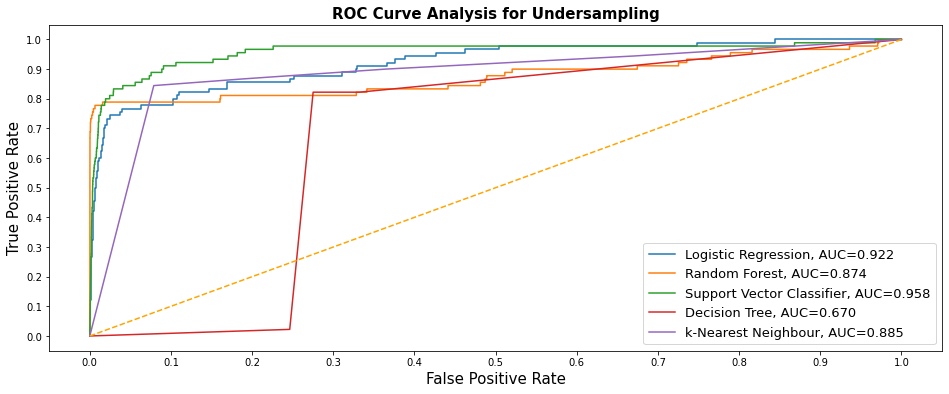

In [36]:
# Plot the ROC curve for undersampling
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(16,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Undersampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()